In [1]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# load the dataset
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# display the number of rows and columns in the DataFrame
print(df.shape)

(303, 14)


In [6]:
# check for any null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# display the data types of each column in the DataFrame
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [8]:
# prepare feature set (X) and target lables (y)
X = df.iloc[:,0:13]
y = df.target

In [9]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# initialize the DecisionTreeClassifier model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
# fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# make predictions on testing set
y_pred = model.predict(X_test)

In [12]:
# training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

Training Accuracy: 86.34%


In [13]:
# test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 77.63%


In [14]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n{conf_matrix}")

Confusion Matrix
[[28  7]
 [10 31]]


In [15]:
# classification report
clsf_report = classification_report(y_test, y_pred)
print(f"Classification Report\n{clsf_report}")

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.82      0.76      0.78        41

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



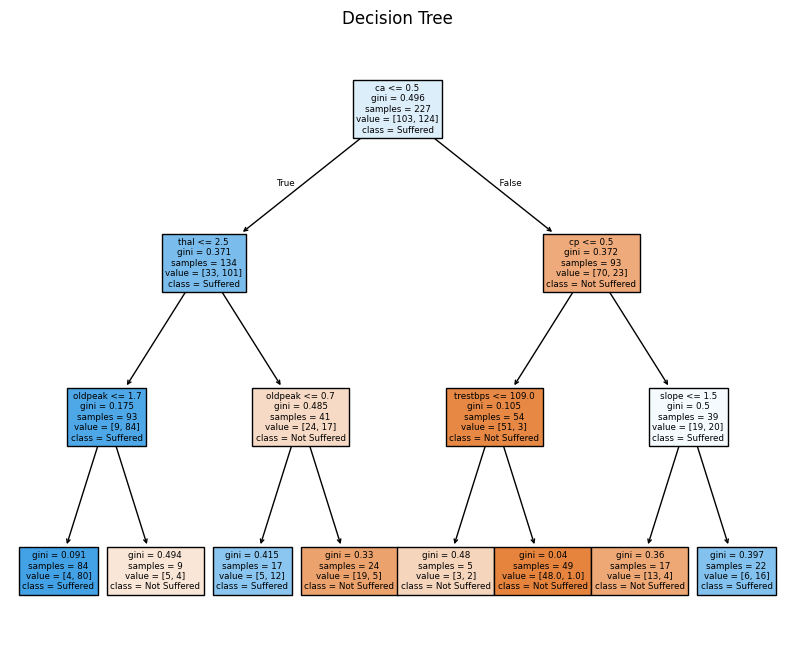

In [16]:
# visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns, class_names=["Not Suffered", "Suffered"], filled=True)
plt.title("Decision Tree")
plt.show()